In [119]:
import warnings
from os import listdir
from os.path import basename, splitext
from itertools import permutations
from multiprocessing import Pool

from sklearn.preprocessing import StandardScaler
from pandas import DataFrame, read_hdf 
from matplotlib import pyplot as plt
from matplotlib import cm 

In [68]:
# Settings
warnings.filterwarnings("ignore")
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = (20, 8)  # Размер картинок

%matplotlib inline

In [3]:
def downsample(dataframe):
    return dataframe.resample('60Min').last()

In [4]:
def to_dataframe(hdf):
    return DataFrame(read_hdf(f"data/hdf/{hdf}"))

In [5]:
def tickername(file):
    return splitext(basename(file))[0]

In [6]:
def load(hdf):
    ticker = tickername(hdf)
    dataframe = to_dataframe(hdf)
    dataframe.columns = [ticker]
    return downsample(dataframe)

In [7]:
# Check data
ethbtc = load('ethbtc.hdf')
ethbtc.head(5)

,ethbtc
Date_Time,
2017-07-14 07:00:00,0.086347
2017-07-14 08:00:00,0.085399
2017-07-14 09:00:00,0.087200
2017-07-14 10:00:00,0.088591
2017-07-14 11:00:00,0.088888


In [8]:
ethbtc.count()

ethbtc    9368
dtype: int64

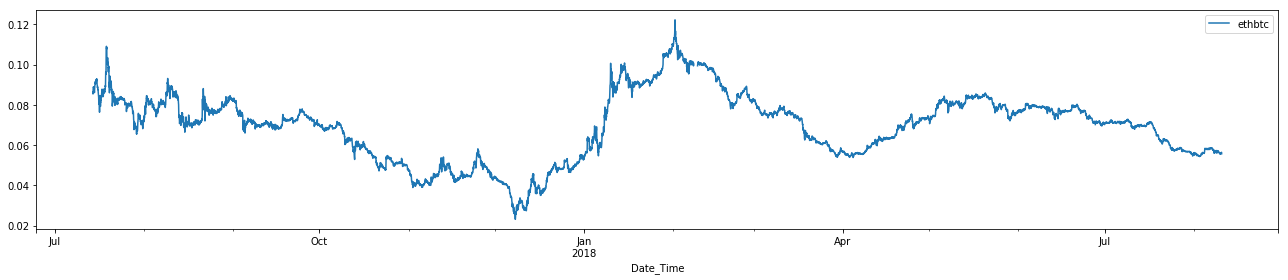

In [9]:
ethbtc.plot(figsize=(18,4))

In [10]:
def get_hdf_files():
    return listdir('data/hdf/')

In [207]:
hdf_files = get_hdf_files()
hdf_files.remove('ethbtc.hdf')
hdf_files

['xrpbtc.hdf',
 'qtumbnb.hdf',
 'omgbtc.hdf',
 'xrpeth.hdf',
 'zeceth.hdf',
 'zrxbtc.hdf',
 'qtumeth.hdf',
 'etcbtc.hdf',
 'xrpbnb.hdf',
 'qtumbtc.hdf',
 'neousdt.hdf',
 'xlmeth.hdf',
 'etcbnb.hdf',
 'zecbtc.hdf',
 'etceth.hdf',
 'omgeth.hdf',
 'xrpusdt.hdf',
 'ethusdt.hdf',
 'qtumusdt.hdf',
 'neobnb.hdf',
 'xlmusdt.hdf',
 'bnbusdt.hdf',
 'dasheth.hdf',
 'ltceth.hdf',
 'bnbbtc.hdf',
 'btcusdt.hdf',
 'adausdt.hdf',
 'bnbeth.hdf',
 'neobtc.hdf',
 'adabnb.hdf',
 'xmrbtc.hdf',
 'neoeth.hdf',
 'adaeth.hdf',
 'xmreth.hdf',
 'ltcusdt.hdf',
 'xlmbnb.hdf',
 'adabtc.hdf',
 'ltcbnb.hdf',
 'etcusdt.hdf',
 'zrxeth.hdf',
 'xlmbtc.hdf',
 'ltcbtc.hdf',
 'dashbtc.hdf']

In [208]:
def add(base, tickers): 
    for ticker in tickers:
        base = base.join(ticker)
        base.dropna(inplace=True)
    return base 

In [209]:
tickers = Pool().map(load, hdf_files)
result_dataframe = add(ethbtc, tickers)
result_dataframe.head(3)

,ethbtc,xrpbtc,qtumbnb,omgbtc,xrpeth,zeceth,zrxbtc,qtumeth,etcbtc,xrpbnb,...,xmreth,ltcusdt,xlmbnb,adabtc,ltcbnb,etcusdt,zrxeth,xlmbtc,ltcbtc,dashbtc
Date_Time,,,,,,,,,,,,,,,,,,,,,
2018-06-12 05:00:00,0.077528,0.000086,0.77842,0.001427,0.001110,0.38827,0.000150,0.022680,0.002262,0.03823,...,0.25562,106.56,0.01615,0.000026,6.91,15.5300,0.001937,0.000036,0.015566,0.038798
2018-06-12 06:00:00,0.077175,0.000086,0.77324,0.001413,0.001110,0.38968,0.000149,0.022889,0.002242,0.03720,...,0.25553,105.00,0.01588,0.000026,6.75,15.2300,0.001940,0.000036,0.015446,0.039055
2018-06-12 07:00:00,0.077697,0.000086,0.76153,0.001405,0.001104,0.38883,0.000150,0.022943,0.002296,0.03678,...,0.25376,106.35,0.01564,0.000026,6.69,15.6002,0.001932,0.000036,0.015618,0.038967


In [210]:
def ration(df):
    for ticker in df.columns:
        df[ticker] = StandardScaler().fit_transform(
            df[ticker].values.reshape(-1, 1))
    return df 

In [230]:
ration_dataframe = ration(result_dataframe)
ration_dataframe.head(3)

,ethbtc,xrpbtc,qtumbnb,omgbtc,xrpeth,zeceth,zrxbtc,qtumeth,etcbtc,xrpbnb,...,xmreth,ltcusdt,xlmbnb,adabtc,ltcbnb,etcusdt,zrxeth,xlmbtc,ltcbtc,dashbtc
Date_Time,,,,,,,,,,,,,,,,,,,,,
2018-06-12 05:00:00,1.315797,1.804590,2.380457,1.534198,2.173736,-0.407647,0.773333,2.475940,-0.481585,1.754833,...,-1.203284,2.763782,-0.283944,1.930592,1.785112,-0.515348,-0.377464,0.739400,2.112015,0.971302
2018-06-12 06:00:00,1.270867,1.749543,2.312375,1.472052,2.173736,-0.372779,0.727885,2.587676,-0.570369,1.351413,...,-1.207897,2.580296,-0.356667,1.787722,1.472555,-0.754700,-0.370322,0.712635,2.036895,1.032930
2018-06-12 07:00:00,1.337308,1.767200,2.158466,1.436539,2.026716,-0.393799,0.797572,2.616545,-0.330653,1.186912,...,-1.298638,2.739082,-0.421310,1.823440,1.355346,-0.459340,-0.391801,0.719326,2.144567,1.011828


In [266]:
def by_ticker(ticker):    
    for idx, quoted in enumerate(['usdt', 'btc', 'eth', 'bnb']):
        if ticker.find(quoted) in [-1, 0]:
            continue
        else:
            return idx

In [269]:
def sort_tickers(df):
    tickers = list(df.columns)
    sorted_tickers = sorted(tickers, key=by_ticker)
    print(sorted_tickers)
    return df[sorted_tickers]

In [270]:
ration_dataframe = sort_tickers(ration_dataframe)

['adausdt', 'bnbusdt', 'btcusdt', 'etcusdt', 'ltcusdt', 'ethusdt', 'xlmusdt', 'qtumusdt', 'neousdt', 'xrpusdt', 'adabtc', 'bnbbtc', 'zecbtc', 'etcbtc', 'ltcbtc', 'omgbtc', 'dashbtc', 'ethbtc', 'xlmbtc', 'qtumbtc', 'neobtc', 'xrpbtc', 'xmrbtc', 'zrxbtc', 'adaeth', 'bnbeth', 'zeceth', 'etceth', 'ltceth', 'omgeth', 'dasheth', 'xlmeth', 'qtumeth', 'neoeth', 'xrpeth', 'xmreth', 'zrxeth', 'adabnb', 'etcbnb', 'ltcbnb', 'xlmbnb', 'qtumbnb', 'neobnb', 'xrpbnb']


In [271]:
corr = ration_dataframe.corr()
corr.head()

,adausdt,bnbusdt,btcusdt,etcusdt,ltcusdt,ethusdt,xlmusdt,qtumusdt,neousdt,xrpusdt,...,xrpeth,xmreth,zrxeth,adabnb,etcbnb,ltcbnb,xlmbnb,qtumbnb,neobnb,xrpbnb
adausdt,1.000000,0.159234,0.552555,0.124517,0.762047,0.751219,0.687320,0.555200,0.703225,0.604403,...,-0.056098,-0.051587,0.289417,0.773500,-0.007758,0.771920,0.530306,0.632140,0.642420,0.613892
bnbusdt,0.159234,1.000000,-0.251595,-0.341171,0.645304,0.585662,-0.194847,0.676488,0.421431,0.703874,...,0.520145,-0.666816,-0.628102,-0.497984,-0.848941,-0.320398,-0.563342,0.149069,-0.252443,-0.311811
btcusdt,0.552555,-0.251595,1.000000,0.370594,0.096739,0.084317,0.947150,-0.244190,-0.004631,-0.111304,...,-0.417599,0.450675,0.738157,0.638003,0.370885,0.410161,0.887675,-0.124924,0.174041,0.175701
etcusdt,0.124517,-0.341171,0.370594,1.000000,-0.174721,0.019907,0.247876,-0.246756,0.076281,-0.203442,...,-0.504797,0.439632,0.495141,0.317102,0.779951,0.170876,0.330777,-0.054217,0.324000,0.165972
ltcusdt,0.762047,0.645304,0.096739,-0.174721,1.000000,0.939979,0.215557,0.917265,0.867875,0.952523,...,0.406043,-0.481873,-0.293698,0.253489,-0.498337,0.513415,-0.063404,0.742754,0.473944,0.462364


In [272]:
def plot_corr(corr, size=10):
    count = len(corr.columns)
    ticks = range(count)
    labels = list(corr.columns)
    
    cmap = cm.get_cmap('jet', 10)
    fig, ax = plt.subplots(figsize=(size, size))
    
    ax.matshow(corr)
    cax = ax.imshow(corr, interpolation="nearest", cmap=cmap)
    plt.xticks(ticks, labels, rotation='vertical')
    plt.yticks(ticks, labels)
    
    colorbar = fig.colorbar(cax, ticks=[1, 0, -1])

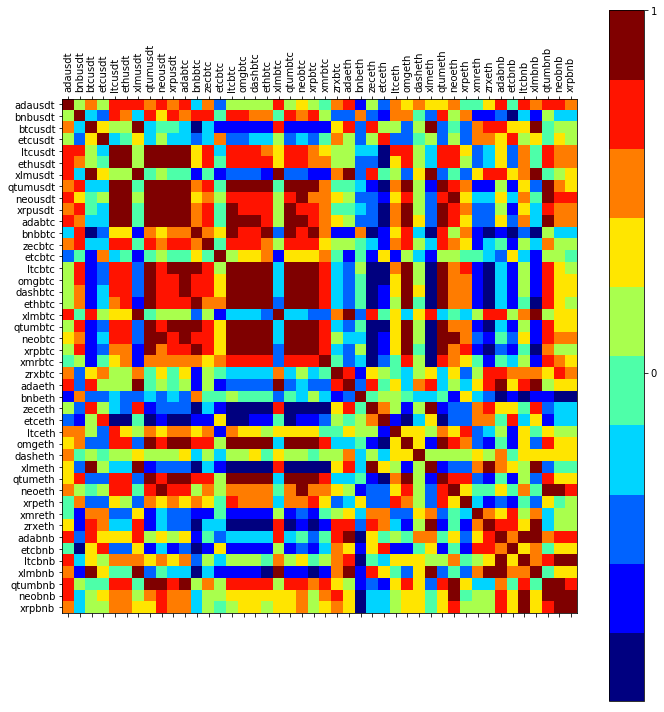

In [273]:
plot_corr(corr)

# Сorrelation Matrix Plot: